In [1]:
import pypsa
import pandas as pd
import numpy as np
import os

In [2]:
solver = "highs"

*** 
Check-point 1:

**Build a network in PyPSA with two nodes (`bus`) and following components to build a simple green hydrogen production system:**

1. A `Hydrogen` bus with hydrogen as `carrier`.
   1. A hydrogen demand load connected to this bus.
2. A `Hydrogen_storage` bus with hydrogen as `carrier`.
   1. A hydrogen store connected to this bus.
3. A bi-directional link to transfer the hydrogen between hydrogen and hydrogen storage buses.


**For simplicity, we assume the hydrogen demand profile to be flat for now. For help, you should have a look at the [PyPSA documentation](https://pypsa.readthedocs.io/en/latest/) and the [optimzation with Linopy](https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy.html), understand what the [components documentation](https://pypsa.readthedocs.io/en/latest/user-guide/components.html) of PyPSA gives you and that you can find the underlying objective function and constraints in the [System Optimization documentation](https://pypsa.readthedocs.io/en/stable/user-guide/optimal-power-flow.html).**

> **Remarks:** For time reasons, you do not have to build the network from scratch. However, to get you acquainted with PyPSA we have omitted a few elements or some of the parameters of the network marked by three question marks `???`. Either, you have to add an element similar to the one in the box above or add a few parameters.

<img src="../../data/block diagrams/d2_e2-1.svg" width=600/>

Initialize network

In [3]:
# Create empty PyPSA network
network = pypsa.Network(name="d2_h2_system_example_2")

In [4]:
# Set snapshots to the year 2023 and at hourly resolution
snapshots = pd.date_range("01-01-2023", "01-01-2024", freq="h", inclusive="left")
network.set_snapshots(snapshots)

Add a `hydrogen` bus with hydrogen as `carrier`

In [5]:
network.add(class_name="Bus", name="hydrogen", carrier="hydrogen")

Index(['hydrogen'], dtype='object')

Add an`hydrogen_storage` bus with hydrogen as `carrier`

In [6]:
network.add(class_name="Bus", name="hydrogen_storage", carrier="hydrogen")

Index(['hydrogen_storage'], dtype='object')

Add constant hourly hydrogen load of `10MW` at the hydrogen bus. The name of the load can be `hydrogen_load`

In [7]:
network.add(class_name="Load", name="hydrogen_load", bus="hydrogen", p_set=10)

Index(['hydrogen_load'], dtype='object')

Add a store at the hydrogen_storage bus with a initial energy capacity of `87600MWh`, and marginal cost of `0$/MWh` into the network. The name of the store can be `hydrogen_tank`. 

In [8]:
network.add(
    class_name="Store",
    name="hydrogen_tank",
    bus="hydrogen_storage",
    carrier="hydrogen",
    e_nom_extendable=True,
    e_cyclic=False,
    e_initial=87600,  # MWh
    marginal_cost=0.01,  # $/MWh
)

Index(['hydrogen_tank'], dtype='object')

Add a bidirectional link, representing the hydrogen charging and discharging between hydrogen and hydrogen_storage with marginal cost of `0$/MWh` into the network. The name of the link can be `hydrogen_flow`. 

In [9]:
network.add(
    class_name="Link",
    name="hydrogen_flow",
    bus0="hydrogen",
    bus1="hydrogen_storage",
    p_nom_extendable=True,
    marginal_cost=0.01,  # $/MWh
    efficiency=1,
    p_min_pu=-1,
)

Index(['hydrogen_flow'], dtype='object')

Now try to solve your network

In [10]:
# Solve network using cbc solver
network.optimize(pyomo=False, solver_name=solver)

Index(['hydrogen_flow'], dtype='object', name='Link')
Index(['hydrogen', 'hydrogen_storage'], dtype='object', name='Bus')
Index(['hydrogen_tank'], dtype='object', name='Store')


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - pyomo: False
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 45.85it/s]
INFO:linopy.io: Writing time: 1.01s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 26282 primals, 61322 duals
Objective: 4.37e-14
Solver model: available
Solver message: Optimal



ERROR:   getOptionIndex: Option "pyomo" is unknown
Running HiGHS 1.12.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
LP linopy-problem-lldc3c8g has 61322 rows; 26282 cols; 113881 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [1e-02, 1e-02]
  Bound   [0e+00, 0e+00]
  RHS     [1e+01, 9e+04]
Presolving model
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve reductions: rows 0(-61322); columns 0(-26282); nonzeros 0(-113881) - Reduced to empty
Performed postsolve
Solving the original LP from the solution after postsolve

Model name          : linopy-problem-lldc3c8g
Model status        : Optimal
Objective value     :  4.3715031595e-14
P-D objective error :  4.3715031595e-14
HiGHS run time      :          0.09


INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Link-ext-p-lower, Link-ext-p-upper, Store-ext-e-lower, Store-ext-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

Lets look at some results! Back to read the docs. How would you look at results?

<Axes: xlabel='snapshot'>

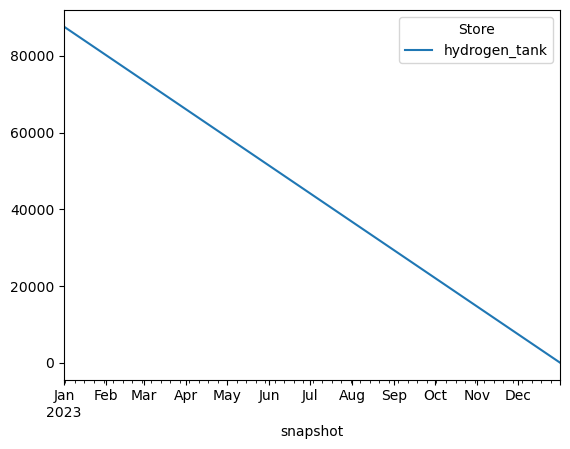

In [11]:
# Inspect the change of energy capacity in hydrogen_tank store to supply loads
network.stores_t.e.plot()

<Axes: xlabel='snapshot'>

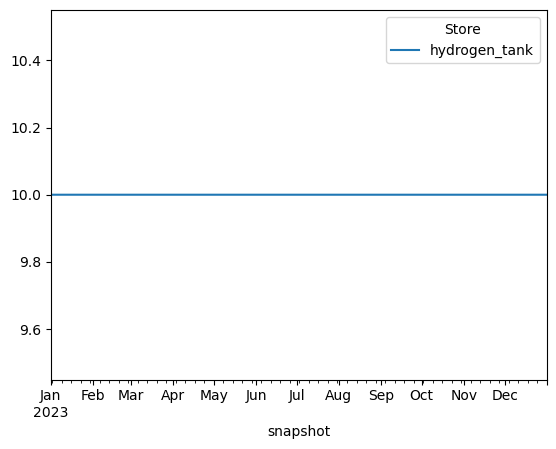

In [12]:
# Inspect the change of power capacity in hydrogen_tank store to supply loads
network.stores_t.p.plot()

<Axes: xlabel='snapshot'>

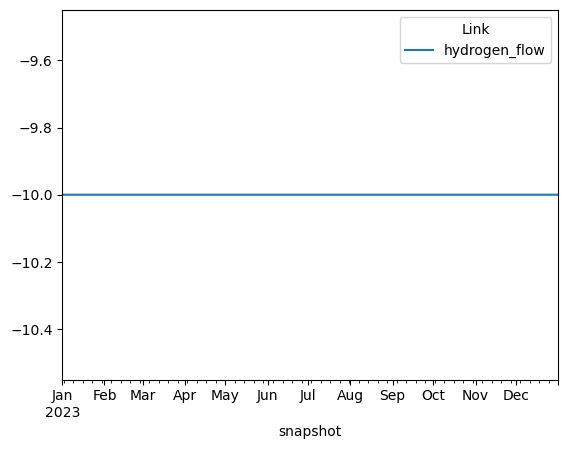

In [13]:
# Inspect the charging flow
network.links_t.p0.plot()

Ending of check-point 1 - export network

In [14]:
# Export network
network.export_to_netcdf("../../results/network_d2_e2-1.nc")

INFO:pypsa.network.io:Exported network 'd2_h2_system_example_2'saved to '../../results/network_d2_e2-1.nc contains: links, loads, buses, stores


<xarray.Dataset> Size: 771kB
Dimensions:                       (snapshots: 8760, investment_periods: 0,
                                   links_i: 1, links_t_p0_i: 1,
                                   links_t_p1_i: 1, loads_i: 1, loads_t_p_i: 1,
                                   buses_i: 2, buses_t_marginal_price_i: 1,
                                   stores_i: 1, stores_t_p_i: 1, stores_t_e_i: 1)
Coordinates:
  * snapshots                     (snapshots) int64 70kB 0 1 2 ... 8758 8759
  * investment_periods            (investment_periods) object 0B 
  * links_i                       (links_i) object 8B 'hydrogen_flow'
  * links_t_p0_i                  (links_t_p0_i) object 8B 'hydrogen_flow'
  * links_t_p1_i                  (links_t_p1_i) object 8B 'hydrogen_flow'
  * loads_i                       (loads_i) object 8B 'hydrogen_load'
  * loads_t_p_i                   (loads_t_p_i) object 8B 'hydrogen_load'
  * buses_i                       (buses_i) object 16B 'hydrogen' 'hydrogen_s...
  * buses_t_marginal_price_i      (buses_t_marginal_price_i) object 8B 'hydro...
  * stores_i                      (stores_i) object 8B 'hydrogen_tank'
  * stores_t_p_i                  (stores_t_p_i) object 8B 'hydrogen_tank'
  * stores_t_e_i                  (stores_t_e_i) object 8B 'hydrogen_tank'
Data variables: (12/28)
    snapshots_snapshot            (snapshots) datetime64[ns] 70kB 2023-01-01 ...
    snapshots_objective           (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_stores              (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_generators          (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    investment_periods_objective  (investment_periods) object 0B 
    investment_periods_years      (investment_periods) object 0B 
    ...                            ...
    stores_e_nom_extendable       (stores_i) bool 1B True
    stores_e_initial              (stores_i) float64 8B 8.76e+04
    stores_marginal_cost          (stores_i) float64 8B 0.01
    stores_e_nom_opt              (stores_i) float64 8B 8.759e+04
    stores_t_p                    (snapshots, stores_t_p_i) float64 70kB 10.0...
    stores_t_e                    (snapshots, stores_t_e_i) float64 70kB 8.75...
Attributes:
    network__linearized_uc:       0
    network__multi_invest:        0
    network__objective:           4.371503159461554e-14
    network__objective_constant:  0.0
    network_name:                 d2_h2_system_example_2
    network_objective:            4.371503159461554e-14
    network_objective_constant:   0.0
    network_pypsa_version:        0.35.2
    network_srid:                 4326
    crs:                          {"_crs": "GEOGCRS[\"WGS 84\",ENSEMBLE[\"Wor...
    meta:                         {}